In [1]:
# dependencies
import os, sys
from dotenv import load_dotenv
load_dotenv()

PROJECT_PATH = os.getenv("PROJECT_PATH")
sys.path.append(PROJECT_PATH)

In [2]:
# custom modules
from src.utils.paths import ProjectPaths
from src.utils.helper import load_data, save_data
from src.visualization.visualize_data import (
    UnivariateAnalysis, 
    MultivariateAnalysis
)
from src.data.preprocess_data import (
    DataCleaning, 
    EDA
)
from src.features.feature_engineering import (
    EncodingScaling
)

In [3]:
paths = ProjectPaths(PROJECT_PATH)
uni_analysis, multi_analysis = UnivariateAnalysis(), MultivariateAnalysis()
pp, eda = DataCleaning(), EDA()
es = EncodingScaling()

Project Path: /Users/amanbhatt/Desktop/projects/insurance-cross-selling


In [4]:
data = load_data(paths.RAW_DATA_PATH, 'train.csv')

### Pre-Processing

In [5]:
data = pp.drop_columns(data, ['id'])

Dropped columns: id


In [6]:
eda.explore_data(data)

DataFrame Shape:
(11504798, 11)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB
None

DataFrame Description:
                Age  Driving_License   Region_Code  Previously_Insured  \
count  1.150480e+07     1.150480e+07  1.150480e+07        1.150480e+07   
mean   3.838356e+01     9.980220e-01  2.641869e+01        4.629966e-01   
std    1.499346e+01     4.443120e-02  1.299159e+01        4.986289

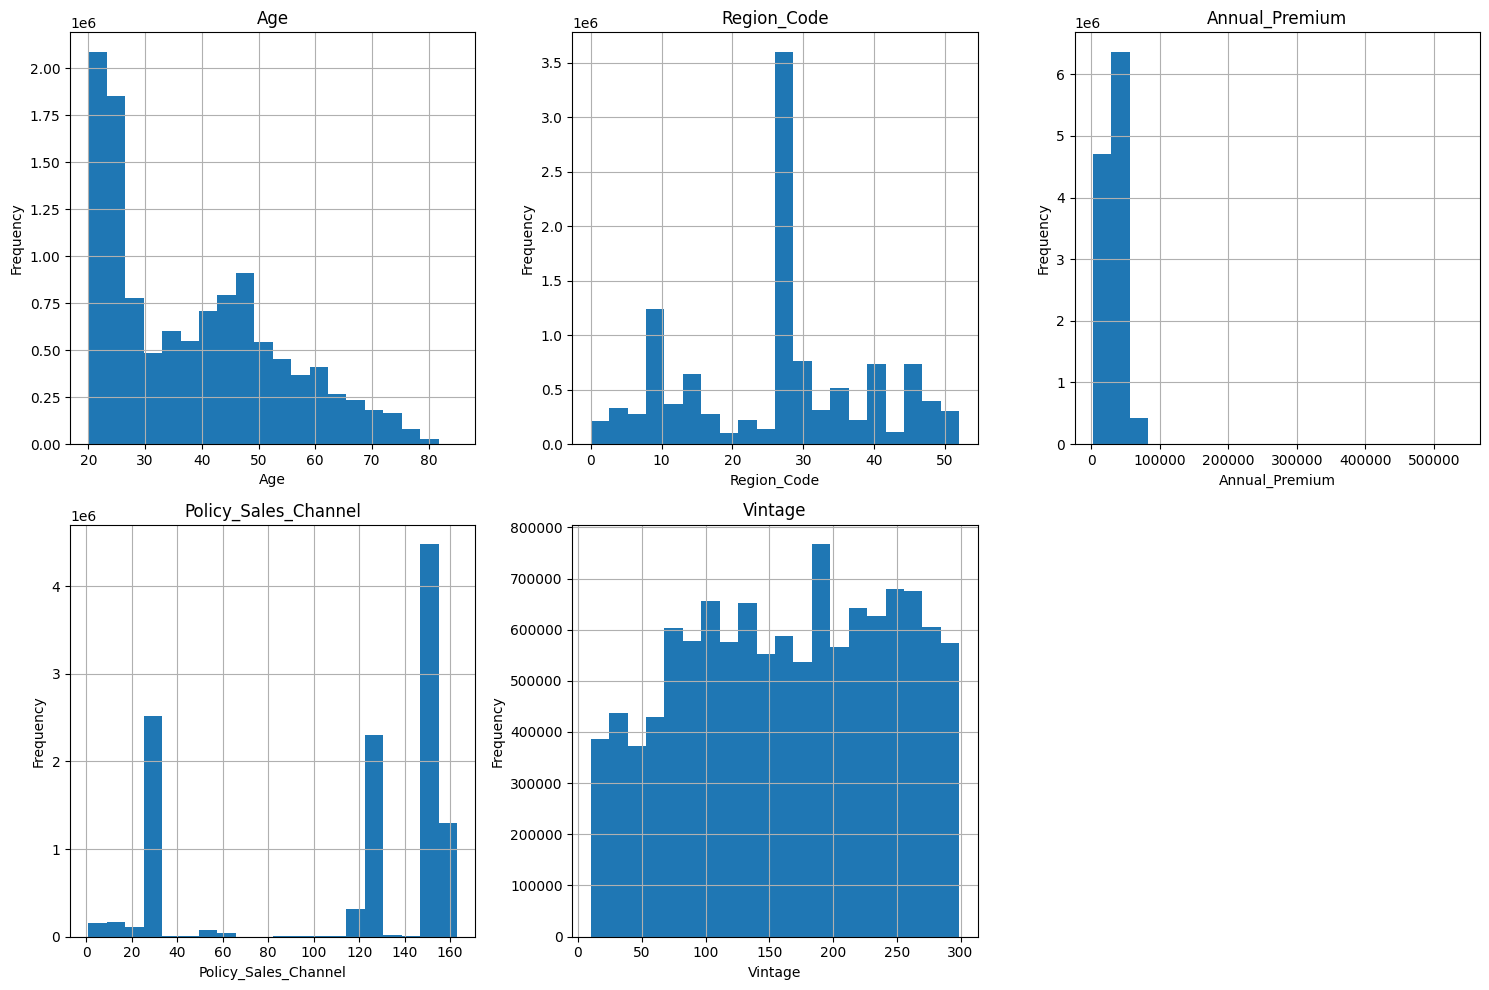

In [7]:
columns_to_plot = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
uni_analysis.hist_plot(data, columns_to_plot, bins=20)

In [8]:
# categorical_features = ['Gender', 'Driving_License', 'Previously_Insured' , 'Vehicle_Age', 'Vehicle_Damage', 'Response']
# count_plot(data, columns=categorical_features)

In [9]:
target_feature = 'Response'

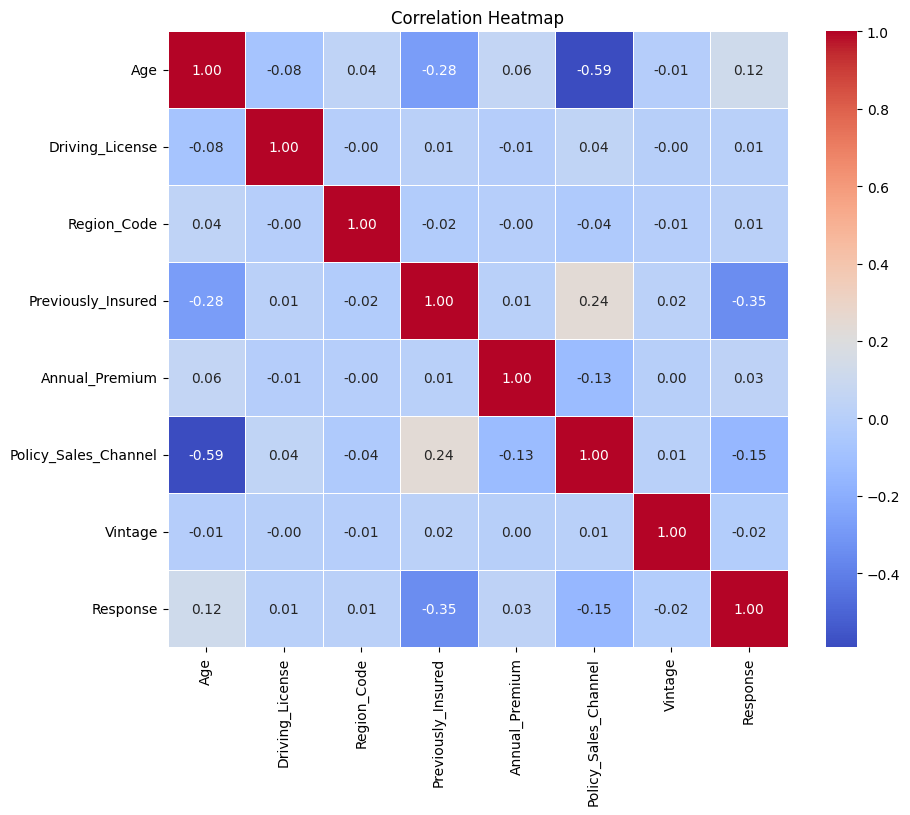

In [10]:
multi_analysis.heatmap(data)

In [11]:
target = 'Response'

In [12]:
data = es.fit_transform(data, target)

In [13]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,-1.159410,0.044519,0.660528,-0.928539,0,1,2.105145,0.214202,0.288852,0
1,1,0.307897,0.044519,0.121718,-0.928539,2,1,1.728962,-1.599414,1.551675,1
2,0,-0.892627,0.044519,-0.955902,1.076960,1,0,0.460756,0.732378,1.126566,0
3,0,-0.225669,0.044519,-1.956550,-0.928539,0,1,-1.691389,0.806403,-1.099003,0
4,0,-0.158974,0.044519,-0.878929,1.076960,0,0,0.090529,0.732378,1.626694,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,0.641376,0.044519,-1.571685,-0.928539,0,1,-0.185319,-1.599414,0.676451,0
11504794,0,-0.825931,0.044519,0.737501,-0.928539,1,1,-0.057878,0.732378,-0.611378,1
11504795,0,-0.625844,0.044519,0.429609,1.076960,1,0,-1.691389,0.732378,0.313859,0
11504796,0,0.841463,0.044519,0.121718,-0.928539,0,1,1.092793,-1.599414,1.376630,1


In [14]:
save_data(data, paths.PROCESSED_DATA_PATH, 'training_data.pkl')